# team22_jupyter_notebook

In [1]:
import pandas as pd
import numpy as np
import itertools

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from imblearn.under_sampling import RandomUnderSampler

import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
df_profile  = pd.read_csv('dataset/user_profile.csv')
df_profile = df_profile.drop(df_profile.columns[0], axis=1)
df_profile.head()

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,user_id,user_signup_timestamp,state,zipcode,is_homeowner,gender,tradelines_avg_days_since_opened,tradelines_max_days_since_opened,tradelines_min_days_since_opened,count_tradelines_closed_accounts,...,total_mortgage_loans_balance,total_auto_loans_balance,total_student_loans_balance,count_inquiries_3_months,count_inquiries_6_months,count_inquiries_12_months,recent_bankruptcy_date,count_bankruptcy,age_bucket,credit_score_bucket
0,50991631a5e7fafd8b5856fc15e3d1a3af5dcf98,2018-07-25 21:06:12,AR,72762,True,Female,2385.16,7446.0,481.0,1,...,26049.0,0.0,0.0,0,0,0,NaN,0,"(45.0, 50.0]","(630.0, 635.0]"
1,18db173b8b0fb250985a4db2f3f8593ee9658707,2018-07-01 22:01:56,NE,68111,False,NaN,909.25,1780.0,152.0,7,...,0.0,12992.0,0.0,0,0,1,NaN,0,"(50.0, 55.0]","(575.0, 580.0]"
2,cabee62f0c4f26bb088f4a48d9ca5efa3a4f96e3,2018-07-02 08:47:21,AL,36078,False,Male,1544.00,3975.0,251.0,8,...,86987.0,0.0,0.0,0,0,1,NaN,0,"(50.0, 55.0]","(685.0, 690.0]"
3,bb34f48b56a57e834c5c612b835d5a691f7357e8,2018-07-02 02:07:53,MT,59923,True,Unisex,831.60,2573.0,40.0,8,...,148912.0,46046.0,0.0,3,3,12,NaN,0,"(50.0, 55.0]","(625.0, 630.0]"
4,6da929725c76c01aa151d97060df2e6bd051e31e,2018-07-03 17:36:42,PA,19040,False,Female,1226.60,2510.0,186.0,1,...,0.0,16262.0,24134.0,0,0,3,NaN,0,"(20.0, 25.0]","(630.0, 635.0]"


In [3]:
df_engagement = pd.read_csv('dataset/user_engagement.csv')
df_engagement.head()

,Unnamed: 0,session_id,user_id,session_length,view_count,view_aoop_overview_count,view_my_credit_count,view_credit_monitoring_count,view_my_recommendations_count,view_my_borrowing_power_count,...,click_count_auto_products.1,logged_in_count,session_start_timestamp,city,state,browser_name,browser_version,app_version,login_platform,os_name
0,0,0e0808b9c2f0ee6367e1b2a2956ce964e25b726e,09a33bca3fa1f49f784b9c417e77294737bccab9,187,2,1,0,0,0,0,...,0,1,2018-07-01 06:43:06,Orem,UT,Chrome Mobile,67.0,NaN,Mobile Web,Android
1,1,9407da7db039a2cafbae0970fcf8feb4766e15c6,6f8353af26427d39c9dd3ce84740df54479896dd,359,9,2,1,0,1,2,...,0,1,2018-07-01 09:25:59,Sacramento,CA,Mobile Safari,11.0,NaN,Mobile Web,OS X
2,2,cc7df3be90aba49cf438bec126f76570ca8626ef,60513e969b461d15bc6f91a7a822177b9126c5f4,307,2,1,0,0,0,0,...,0,1,2018-07-01 09:48:27,Saint Cloud,MN,Mobile Safari,NaN,NaN,Mobile Web,OS X
3,3,3b1fdedea217865b461f180b011a56af6505a43a,531600a9890794688120be32259c356057a2207a,0,1,0,0,0,0,0,...,0,0,2018-07-01 12:16:04,Collinsville,IL,Chrome Mobile,67.0,NaN,Mobile Web,Android
4,4,1e83196264ebeb9db5bc35c50f9f0462b5c24b36,d72ab2f9299e7c1db705ab1159825ada25d9dad6,469,8,1,1,0,1,1,...,0,1,2018-07-01 13:39:15,Mabank,TX,Mobile Safari,11.0,NaN,Mobile Web,OS X


#### Data Aggregation

In [4]:
#### total logins per user
total_logins = df_engagement.groupby(['user_id'])['session_id'].count()
df_profile['total_logins'] = df_profile['user_id'].map(total_logins)
df_profile['total_logins'] = df_profile['total_logins'].fillna(0)
df_profile['total_logins'].head()

0     1.0
1     2.0
2     3.0
3    16.0
4     2.0
Name: total_logins, dtype: float64

In [5]:
#### total session length per user
total_session_length = df_engagement.groupby(['user_id'])['session_length'].sum()
df_profile['total_session_length'] = df_profile['user_id'].map(total_session_length)
df_profile['total_session_length'] = df_profile['total_session_length'].fillna(0)
df_profile['total_session_length'].head()

0       0.0
1     673.0
2     806.0
3    2347.0
4     260.0
Name: total_session_length, dtype: float64

In [6]:
#### average session length per user
avg_session_length = df_engagement.groupby(['user_id'])['session_length'].mean()
df_profile['avg_session_length'] = df_profile['user_id'].map(avg_session_length)
df_profile['avg_session_length'] = df_profile['avg_session_length'].fillna(0)
df_profile['avg_session_length'].head()

0      0.000000
1    336.500000
2    268.666667
3    146.687500
4    130.000000
Name: avg_session_length, dtype: float64

In [7]:
#### total page views per user
total_page_views = df_engagement.groupby(['user_id'])['view_count'].sum()
df_profile['total_page_views'] = df_profile['user_id'].map(total_page_views)
df_profile['total_page_views'] = df_profile['total_page_views'].fillna(0)
df_profile['total_page_views'].head()

0     2.0
1     5.0
2    13.0
3    69.0
4     8.0
Name: total_page_views, dtype: float64

In [8]:
#### average session length per user
avg_page_views = df_engagement.groupby(['user_id'])['view_count'].mean()
df_profile['avg_page_views'] = df_profile['user_id'].map(avg_page_views)
df_profile['avg_page_views'] = df_profile['avg_page_views'].fillna(0)
df_profile['avg_page_views'].head()

0    2.000000
1    2.500000
2    4.333333
3    4.312500
4    4.000000
Name: avg_page_views, dtype: float64

In [9]:
#### total click counts per user
total_click_counts = df_engagement.groupby(['user_id'])['click_count'].sum()
df_profile['total_click_counts'] = df_profile['user_id'].map(total_click_counts)
df_profile['total_click_counts'] = df_profile['total_click_counts'].fillna(0)
df_profile['total_click_counts'].head()

0     0.0
1     6.0
2    43.0
3    38.0
4    11.0
Name: total_click_counts, dtype: float64

In [10]:
#### average click counts per user
avg_click_counts = df_engagement.groupby(['user_id'])['click_count'].mean()
df_profile['avg_click_counts'] = df_profile['user_id'].map(avg_click_counts)
df_profile['avg_click_counts'] = df_profile['avg_click_counts'].fillna(0)
df_profile['avg_click_counts'].head()

0     0.000000
1     3.000000
2    14.333333
3     2.375000
4     5.500000
Name: avg_click_counts, dtype: float64

In [11]:
#### total apply counts per user
total_apply_counts = df_engagement.groupby(['user_id'])['click_apply_count'].sum()
df_profile['total_apply_counts'] = df_profile['user_id'].map(total_apply_counts)
df_profile['total_apply_counts'] = df_profile['total_apply_counts'].fillna(0)
df_profile['total_apply_counts'].head()

0    0.0
1    0.0
2    0.0
3    0.0
4    1.0
Name: total_apply_counts, dtype: float64

In [12]:
#### average apply counts per user
avg_apply_counts = df_engagement.groupby(['user_id'])['click_apply_count'].mean()
df_profile['avg_apply_counts'] = df_profile['user_id'].map(avg_apply_counts)
df_profile['avg_apply_counts'] = df_profile['avg_apply_counts'].fillna(0)
df_profile['avg_apply_counts'].head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.5
Name: avg_apply_counts, dtype: float64

#### Login Platform

In [13]:
df_engagement['dummy_mobile_web'] = [1 if i == 'Mobile Web' else 0 for i in df_engagement['login_platform']]
df_engagement['dummy_mobile_app'] = [1 if i == 'Mobile App' else 0 for i in df_engagement['login_platform']]
df_engagement['dummy_web'] = [1 if i == 'Web' else 0 for i in df_engagement['login_platform']]
df_engagement.head()

,Unnamed: 0,session_id,user_id,session_length,view_count,view_aoop_overview_count,view_my_credit_count,view_credit_monitoring_count,view_my_recommendations_count,view_my_borrowing_power_count,...,city,state,browser_name,browser_version,app_version,login_platform,os_name,dummy_mobile_web,dummy_mobile_app,dummy_web
0,0,0e0808b9c2f0ee6367e1b2a2956ce964e25b726e,09a33bca3fa1f49f784b9c417e77294737bccab9,187,2,1,0,0,0,0,...,Orem,UT,Chrome Mobile,67.0,NaN,Mobile Web,Android,1,0,0
1,1,9407da7db039a2cafbae0970fcf8feb4766e15c6,6f8353af26427d39c9dd3ce84740df54479896dd,359,9,2,1,0,1,2,...,Sacramento,CA,Mobile Safari,11.0,NaN,Mobile Web,OS X,1,0,0
2,2,cc7df3be90aba49cf438bec126f76570ca8626ef,60513e969b461d15bc6f91a7a822177b9126c5f4,307,2,1,0,0,0,0,...,Saint Cloud,MN,Mobile Safari,NaN,NaN,Mobile Web,OS X,1,0,0
3,3,3b1fdedea217865b461f180b011a56af6505a43a,531600a9890794688120be32259c356057a2207a,0,1,0,0,0,0,0,...,Collinsville,IL,Chrome Mobile,67.0,NaN,Mobile Web,Android,1,0,0
4,4,1e83196264ebeb9db5bc35c50f9f0462b5c24b36,d72ab2f9299e7c1db705ab1159825ada25d9dad6,469,8,1,1,0,1,1,...,Mabank,TX,Mobile Safari,11.0,NaN,Mobile Web,OS X,1,0,0


In [14]:
#### mobile_web login counts
mobile_web_logins = df_engagement.groupby(['user_id'])['dummy_mobile_web'].sum()
df_profile['mobile_web_logins'] = df_profile['user_id'].map(mobile_web_logins)
df_profile['mobile_web_logins'] = df_profile['mobile_web_logins'].fillna(0)
df_profile['mobile_web_logins'].head()

0     1.0
1     2.0
2     2.0
3    15.0
4     0.0
Name: mobile_web_logins, dtype: float64

In [15]:
#### mobile_app login counts
mobile_web_logins = df_engagement.groupby(['user_id'])['dummy_mobile_app'].sum()
df_profile['dummy_mobile_app'] = df_profile['user_id'].map(mobile_web_logins)
df_profile['dummy_mobile_app'] = df_profile['dummy_mobile_app'].fillna(0)
df_profile['dummy_mobile_app'].head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: dummy_mobile_app, dtype: float64

In [16]:
#### dummy_web login countds
web_logins = df_engagement.groupby(['user_id'])['dummy_web'].sum()
df_profile['web_logins'] = df_profile['user_id'].map(web_logins)
df_profile['web_logins'] = df_profile['web_logins'].fillna(0)
df_profile['web_logins'].head()

0    0.0
1    0.0
2    1.0
3    1.0
4    2.0
Name: web_logins, dtype: float64

In [17]:
df_profile.head()

,user_id,user_signup_timestamp,state,zipcode,is_homeowner,gender,tradelines_avg_days_since_opened,tradelines_max_days_since_opened,tradelines_min_days_since_opened,count_tradelines_closed_accounts,...,avg_session_length,total_page_views,avg_page_views,total_click_counts,avg_click_counts,total_apply_counts,avg_apply_counts,mobile_web_logins,dummy_mobile_app,web_logins
0,50991631a5e7fafd8b5856fc15e3d1a3af5dcf98,2018-07-25 21:06:12,AR,72762,True,Female,2385.16,7446.0,481.0,1,...,0.000000,2.0,2.000000,0.0,0.000000,0.0,0.0,1.0,0.0,0.0
1,18db173b8b0fb250985a4db2f3f8593ee9658707,2018-07-01 22:01:56,NE,68111,False,NaN,909.25,1780.0,152.0,7,...,336.500000,5.0,2.500000,6.0,3.000000,0.0,0.0,2.0,0.0,0.0
2,cabee62f0c4f26bb088f4a48d9ca5efa3a4f96e3,2018-07-02 08:47:21,AL,36078,False,Male,1544.00,3975.0,251.0,8,...,268.666667,13.0,4.333333,43.0,14.333333,0.0,0.0,2.0,0.0,1.0
3,bb34f48b56a57e834c5c612b835d5a691f7357e8,2018-07-02 02:07:53,MT,59923,True,Unisex,831.60,2573.0,40.0,8,...,146.687500,69.0,4.312500,38.0,2.375000,0.0,0.0,15.0,0.0,1.0
4,6da929725c76c01aa151d97060df2e6bd051e31e,2018-07-03 17:36:42,PA,19040,False,Female,1226.60,2510.0,186.0,1,...,130.000000,8.0,4.000000,11.0,5.500000,1.0,0.5,0.0,0.0,2.0


#### Binary Outcome Variation

In [18]:
df_profile['binary_apply_counts'] = [1 if i > 0 else 0 for i in df_profile['total_apply_counts']]
df_profile.head(10)

,user_id,user_signup_timestamp,state,zipcode,is_homeowner,gender,tradelines_avg_days_since_opened,tradelines_max_days_since_opened,tradelines_min_days_since_opened,count_tradelines_closed_accounts,...,total_page_views,avg_page_views,total_click_counts,avg_click_counts,total_apply_counts,avg_apply_counts,mobile_web_logins,dummy_mobile_app,web_logins,binary_apply_counts
0,50991631a5e7fafd8b5856fc15e3d1a3af5dcf98,2018-07-25 21:06:12,AR,72762,True,Female,2385.16,7446.0,481.0,1,...,2.0,2.000000,0.0,0.000000,0.0,0.000000,1.0,0.0,0.0,0
1,18db173b8b0fb250985a4db2f3f8593ee9658707,2018-07-01 22:01:56,NE,68111,False,NaN,909.25,1780.0,152.0,7,...,5.0,2.500000,6.0,3.000000,0.0,0.000000,2.0,0.0,0.0,0
2,cabee62f0c4f26bb088f4a48d9ca5efa3a4f96e3,2018-07-02 08:47:21,AL,36078,False,Male,1544.00,3975.0,251.0,8,...,13.0,4.333333,43.0,14.333333,0.0,0.000000,2.0,0.0,1.0,0
3,bb34f48b56a57e834c5c612b835d5a691f7357e8,2018-07-02 02:07:53,MT,59923,True,Unisex,831.60,2573.0,40.0,8,...,69.0,4.312500,38.0,2.375000,0.0,0.000000,15.0,0.0,1.0,0
4,6da929725c76c01aa151d97060df2e6bd051e31e,2018-07-03 17:36:42,PA,19040,False,Female,1226.60,2510.0,186.0,1,...,8.0,4.000000,11.0,5.500000,1.0,0.500000,0.0,0.0,2.0,1
5,e8a6717452a88ec8d699c0a4181637c67d247e84,2018-07-02 16:11:42,NC,28138,False,Female,546.28,1291.0,68.0,10,...,6.0,6.000000,6.0,6.000000,0.0,0.000000,1.0,0.0,0.0,0
6,03c209fbb349633c40826a83874f92e302382b13,2018-07-05 13:53:15,FL,33136,False,Female,981.00,981.0,981.0,3,...,4.0,1.333333,0.0,0.000000,2.0,0.666667,3.0,0.0,0.0,1
7,ae0ebe7492c5af1fec00c8ecd59f83cc5a659fb2,2018-07-05 04:59:37,UT,84020,False,Male,691.87,2316.0,52.0,9,...,11.0,3.666667,16.0,5.333333,1.0,0.333333,3.0,0.0,0.0,1
8,6bee222d2814703172bbf78bcef85761c4764d90,2018-07-05 11:45:08,TN,38139,False,Female,1261.50,4277.0,60.0,41,...,12.0,4.000000,21.0,7.000000,0.0,0.000000,3.0,0.0,0.0,0
9,e88601d9dfeb0ffa8016ef0e6fa81094643ae8ab,2018-07-05 18:37:29,MS,39520,True,NaN,524.00,524.0,524.0,3,...,7.0,3.500000,8.0,4.000000,0.0,0.000000,2.0,0.0,0.0,0


#### Dropping Variables

In [19]:
for var, count in df_profile.isna().sum().iteritems():
    if count >0:
        print (var, count)
        df_profile = df_profile.drop(columns=[var])
df_profile = df_profile.drop(columns = ['total_apply_counts', 'avg_apply_counts'])

gender 34772
tradelines_avg_days_since_opened 10593
tradelines_max_days_since_opened 10593
tradelines_min_days_since_opened 10593
max_cc_utilization_ratio 153646
avg_cc_utilization_ratio 153656
recent_bankruptcy_date 259814
age_bucket 6957


In [20]:
df_profile.head()

,user_id,user_signup_timestamp,state,zipcode,is_homeowner,count_tradelines_closed_accounts,count_total_tradelines_opened_24_months,count_tradelines_cc_opened_24_months,count_tradelines_condition_derogatory,count_open_installment_accounts_24_months,...,total_session_length,avg_session_length,total_page_views,avg_page_views,total_click_counts,avg_click_counts,mobile_web_logins,dummy_mobile_app,web_logins,binary_apply_counts
0,50991631a5e7fafd8b5856fc15e3d1a3af5dcf98,2018-07-25 21:06:12,AR,72762,True,1,2,0,3,0,...,0.0,0.000000,2.0,2.000000,0.0,0.000000,1.0,0.0,0.0,0
1,18db173b8b0fb250985a4db2f3f8593ee9658707,2018-07-01 22:01:56,NE,68111,False,7,3,1,5,0,...,673.0,336.500000,5.0,2.500000,6.0,3.000000,2.0,0.0,0.0,0
2,cabee62f0c4f26bb088f4a48d9ca5efa3a4f96e3,2018-07-02 08:47:21,AL,36078,False,8,2,0,1,2,...,806.0,268.666667,13.0,4.333333,43.0,14.333333,2.0,0.0,1.0,0
3,bb34f48b56a57e834c5c612b835d5a691f7357e8,2018-07-02 02:07:53,MT,59923,True,8,5,3,1,1,...,2347.0,146.687500,69.0,4.312500,38.0,2.375000,15.0,0.0,1.0,0
4,6da929725c76c01aa151d97060df2e6bd051e31e,2018-07-03 17:36:42,PA,19040,False,1,6,1,0,4,...,260.0,130.000000,8.0,4.000000,11.0,5.500000,0.0,0.0,2.0,1


### Random Forest Classifier

In [21]:
df = df_profile.select_dtypes(['number'])
df.head()

,count_tradelines_closed_accounts,count_total_tradelines_opened_24_months,count_tradelines_cc_opened_24_months,count_tradelines_condition_derogatory,count_open_installment_accounts_24_months,count_tradelines_open_collection_accounts,count_tradelines_open_mortgages,count_tradelines_open_student_loans,count_tradelines_opened_accounts,count_tradelines_open_secured_loans,...,total_session_length,avg_session_length,total_page_views,avg_page_views,total_click_counts,avg_click_counts,mobile_web_logins,dummy_mobile_app,web_logins,binary_apply_counts
0,1,2,0,3,0,2,1,0,6,0,...,0.0,0.000000,2.0,2.000000,0.0,0.000000,1.0,0.0,0.0,0
1,7,3,1,5,0,1,0,0,8,0,...,673.0,336.500000,5.0,2.500000,6.0,3.000000,2.0,0.0,0.0,0
2,8,2,0,1,2,0,1,0,3,2,...,806.0,268.666667,13.0,4.333333,43.0,14.333333,2.0,0.0,1.0,0
3,8,5,3,1,1,0,1,0,10,0,...,2347.0,146.687500,69.0,4.312500,38.0,2.375000,15.0,0.0,1.0,0
4,1,6,1,0,4,0,0,8,15,0,...,260.0,130.000000,8.0,4.000000,11.0,5.500000,0.0,0.0,2.0,1


In [22]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
cols = X_train.columns

#### Undersample to Balance Classes
Balance binary_apply = 0, and binary_apply = 1

In [23]:
usamp = RandomUnderSampler()
us_X_train, us_y_train=usamp.fit_sample(X_train, y_train)
us_X_train = pd.DataFrame(data=us_X_train,columns=cols)
#us_y_train = pd.DataFrame(data=us_y_train,columns=['binary_apply_counts'])

In [24]:
y_train.value_counts()

0    129813
1     98579
Name: binary_apply_counts, dtype: int64

In [25]:
us_y_train

array([0, 0, 0, ..., 1, 1, 1])

#### Random Forest Classifier

In [26]:
clf = RandomForestClassifier(n_estimators=200)
clf.fit(us_X_train, us_y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

#### Cross Validation 

In [27]:
scores = cross_val_score(clf, us_X_train, us_y_train, cv=3, scoring='accuracy')

In [28]:
scores.mean()

0.7104656986507781

#### Testing

In [29]:
clf.score(X_test, y_test)

0.7097322194784497

In [30]:
coefs = zip(list(X.columns), [round(i, 3) for i in list(clf.feature_importances_)])
coefs = sorted(coefs, key = lambda t: t[1])[::-1]
coefs

[('total_session_length', 0.129),
 ('avg_session_length', 0.079),
 ('total_tradelines_open_balance', 0.062),
 ('total_page_views', 0.058),
 ('total_click_counts', 0.049),
 ('avg_click_counts', 0.048),
 ('avg_page_views', 0.047),
 ('mobile_web_logins', 0.041),
 ('count_tradelines_condition_derogatory', 0.04),
 ('count_tradelines_closed_accounts', 0.04),
 ('total_tradelines_amount_past_due', 0.036),
 ('max_cc_limit', 0.034),
 ('count_tradelines_opened_accounts', 0.034),
 ('total_logins', 0.031),
 ('count_total_tradelines_opened_24_months', 0.03),
 ('count_tradelines_open_collection_accounts', 0.029),
 ('count_inquiries_12_months', 0.028),
 ('total_cc_open_balance', 0.028),
 ('total_auto_loans_balance', 0.024),
 ('count_inquiries_6_months', 0.019),
 ('count_inquiries_3_months', 0.015),
 ('total_student_loans_balance', 0.014),
 ('count_open_installment_accounts_24_months', 0.012),
 ('count_tradelines_open_student_loans', 0.011),
 ('count_tradelines_cc_opened_24_months', 0.01),
 ('web_login

In [31]:
df_coefs = pd.DataFrame({'feature': list(X.columns), 'feature_importance': [round(i, 3) for i in list(clf.feature_importances_)]})
df_coefs = df_coefs.sort_values(by=['feature_importance'], ascending=False)
df_coefs = df_coefs.set_index('feature')
df_coefs.head(20)

,feature_importance
feature,
total_session_length,0.129
avg_session_length,0.079
total_tradelines_open_balance,0.062
total_page_views,0.058
total_click_counts,0.049
avg_click_counts,0.048
avg_page_views,0.047
mobile_web_logins,0.041
count_tradelines_closed_accounts,0.040


Text(0,0.5,'Feature Importance')

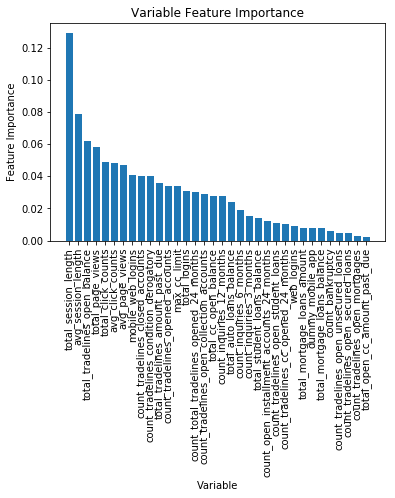

In [32]:
ax = plt.bar(df_coefs.index, df_coefs['feature_importance'])
plt.xticks( rotation='vertical')
plt.title('Variable Feature Importance')
plt.xlabel('Variable')
plt.ylabel('Feature Importance')

In [33]:
max_coef = coefs[0][1]
max_coef

0.129

In [34]:
indexes = []
for i in list(coefs)[:20]:
    indexes.append(i[0])

#### Model Evaluation

In [35]:
con_train = confusion_matrix(us_y_train, pd.DataFrame(clf.predict(us_X_train)))
con_train

array([[98579,     0],
       [    1, 98578]])

In [36]:
con_test = confusion_matrix(y_test, pd.DataFrame(clf.predict(X_test)))
con_test

array([[22426, 10055],
       [ 6519, 18099]])

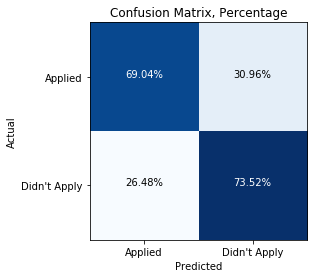

In [37]:
target_names = ['Applied', "Didn't Apply"]
con = confusion_matrix(y_test, pd.DataFrame(clf.predict(X_test)))
con = con.astype('float')/ con.sum(axis=1)[:, np.newaxis]
plt.imshow(con, interpolation='nearest', cmap=plt.get_cmap('Blues'))
tick_marks = np.arange(len(target_names))
thresh = con.max() / 1.5
for i, j in itertools.product(range(con.shape[0]), range(con.shape[1])):
    plt.text(j, i, "{}%".format(round(con[i, j]*100,2)),
             horizontalalignment="center",
             color="white" if con[i, j] > thresh else "black")
plt.xticks(tick_marks, target_names)
plt.yticks(tick_marks, target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix, Percentage')
plt.show()

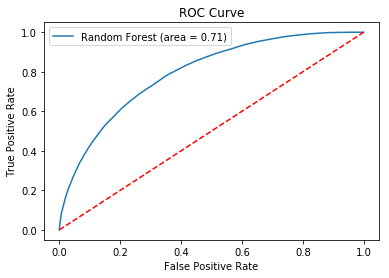

In [38]:
logit_roc_auc = roc_auc_score(y_test, clf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()